In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('D:\\DSEB 63 - NEU\\Năm BA\\Visualization\\Data\\Data\\dseb63_final_project_DP_dataset\\dseb63_bureau.csv')
data.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR
0,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,254629
1,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,254629
2,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,254629
3,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,254629
4,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,254629


In [6]:
data.shape

(1465325, 17)

In [7]:
app_train = pd.read_csv("D:\\DSEB 63 - NEU\\Năm BA\\Visualization\\Data\\Data\\dseb63_final_project_DP_dataset\\dseb63_application_train.csv")
app_train.head()

,Unnamed: 0,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,278621
1,1,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,139008
2,2,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,138348
3,3,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,64140
4,4,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,219374


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465325 entries, 0 to 1465324
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_BUREAU            1465325 non-null  int64  
 1   CREDIT_ACTIVE           1465325 non-null  object 
 2   CREDIT_CURRENCY         1465325 non-null  object 
 3   DAYS_CREDIT             1465325 non-null  int64  
 4   CREDIT_DAY_OVERDUE      1465325 non-null  int64  
 5   DAYS_CREDIT_ENDDATE     1376227 non-null  float64
 6   DAYS_ENDDATE_FACT       920652 non-null   float64
 7   AMT_CREDIT_MAX_OVERDUE  516780 non-null   float64
 8   CNT_CREDIT_PROLONG      1465325 non-null  int64  
 9   AMT_CREDIT_SUM          1465322 non-null  float64
 10  AMT_CREDIT_SUM_DEBT     1242231 non-null  float64
 11  AMT_CREDIT_SUM_LIMIT    975655 non-null   float64
 12  AMT_CREDIT_SUM_OVERDUE  1465325 non-null  float64
 13  CREDIT_TYPE             1465325 non-null  object 
 14  DA

# Understanding of variables

CREDIT_ACTIVE - Current status of a Loan - Closed/ Active (2 values) 

CREDIT_CURRENCY - Currency in which the transaction was executed - Currency1, Currency2, Currency3, Currency4 ( 4 values)

CREDIT_DAY_OVERDUE - Number of overdue days

CREDIT_TYPE - Consumer Credit, Credit card, Mortgage, Car loan, Microloan, Loan for working capital replemishment, Loan for Business development, Real estate loan, Unkown type of laon, Another type of loan. Cash loan, Loan for the purchase of equipment, Mobile operator loan, Interbank credit, Loan for purchase of shares ( 15 values )

DAYS_CREDIT - How many days before current application did client apply for Credit Bureau credit

DAYS_CREDIT_ENDDATE - Remaining duration of CB credit (in days) at the time of application in Home Credit

CREDIT_DAY_OVERDUE - Number of days past due on CB credit at the time of application for related loan in our sample

AMT_CREDIT_SUM - Total available credit for a customer 

AMT_CREDIT_SUM_DEBT - Total amount yet to be repayed 

AMT_CREDIT_SUM_LIMIT - Current Credit that has been utilized 

AMT_CREDIT_SUM_OVERDUE - Current credit payment that is overdue 

CNT_CREDIT_PROLONG - How many times was the Credit date prolonged

# NOTE:
For a given loan transaction 'AMT_CREDIT_SUM' = 'AMT_CREDIT_SUM_DEBT' +'AMT_CREDIT_SUM_LIMIT'

AMT_ANNUITY - Annuity of the Credit Bureau data 

DAYS_CREDIT_UPDATE - Number of days before current application when last CREDIT UPDATE was received 

DAYS_ENDDATE_FACT - Days since CB credit ended at the time of application 

AMT_CREDIT_MAX_OVERDUE - Maximum Credit amount overdue at the time of application

In [9]:
data.duplicated().sum()

0

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_BUREAU,1465325.0,5.890328e+06,5.378271e+05,5000000.000,5416944.0,5.856021e+06,6363543.0,6.843457e+06
DAYS_CREDIT,1465325.0,-1.143600e+03,8.000200e+02,-2922.000,-1671.0,-9.850000e+02,-470.0,0.000000e+00
CREDIT_DAY_OVERDUE,1465325.0,8.887612e-01,3.824707e+01,0.000,0.0,0.000000e+00,0.0,2.792000e+03
DAYS_CREDIT_ENDDATE,1376227.0,4.931322e+02,4.964905e+03,-42060.000,-1144.0,-3.340000e+02,473.0,3.119900e+04
DAYS_ENDDATE_FACT,920652.0,-1.022765e+03,7.183717e+02,-42023.000,-1503.0,-9.000000e+02,-427.0,0.000000e+00
AMT_CREDIT_MAX_OVERDUE,516780.0,3.942852e+03,2.196856e+05,0.000,0.0,0.000000e+00,0.0,1.159872e+08
CNT_CREDIT_PROLONG,1465325.0,7.278249e-03,1.026408e-01,0.000,0.0,0.000000e+00,0.0,9.000000e+00
AMT_CREDIT_SUM,1465322.0,3.516889e+05,1.078009e+06,0.000,51165.0,1.246981e+05,308250.0,3.960000e+08
AMT_CREDIT_SUM_DEBT,1242231.0,1.358890e+05,6.756650e+05,-4705600.320,0.0,0.000000e+00,39654.0,1.701000e+08
AMT_CREDIT_SUM_LIMIT,975655.0,6.363687e+03,4.543915e+04,-586406.115,0.0,0.000000e+00,0.0,4.705600e+06


<AxesSubplot:>

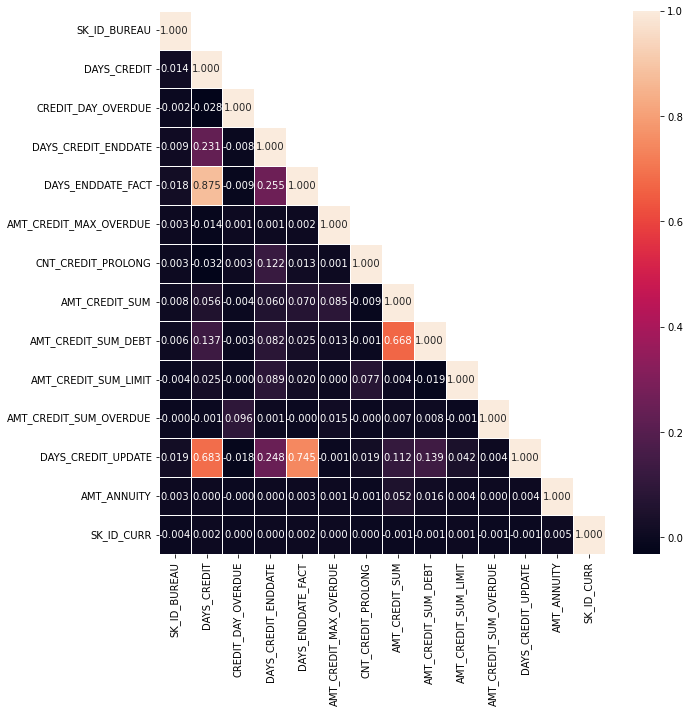

In [11]:
numeric_df = data._get_numeric_data()
numeric_df_corr = numeric_df.corr()
numeric_df_corr

plt.figure(figsize=(10,10))
mask = np.zeros_like(numeric_df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False
sns.heatmap(numeric_df_corr,mask= mask, annot= True, fmt=".3f", linewidth=.5)

In [12]:
numeric_df_corr

,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR
SK_ID_BUREAU,1.000000,0.014469,-0.001878,0.009412,0.017923,0.002837,0.002658,0.008040,0.006045,-0.003956,-0.000491,0.018640,0.002711,-0.003786
DAYS_CREDIT,0.014469,1.000000,-0.028343,0.231075,0.875291,-0.014414,-0.032111,0.055663,0.136678,0.024584,-0.000603,0.683189,0.000144,0.001774
CREDIT_DAY_OVERDUE,-0.001878,-0.028343,1.000000,-0.007540,-0.008780,0.001240,0.002809,-0.003627,-0.002552,-0.000310,0.095782,-0.018188,-0.000408,0.000059
DAYS_CREDIT_ENDDATE,0.009412,0.231075,-0.007540,1.000000,0.254893,0.000783,0.122179,0.060284,0.081933,0.088553,0.001136,0.247783,0.000200,0.000344
DAYS_ENDDATE_FACT,0.017923,0.875291,-0.008780,0.254893,1.000000,0.001590,0.013073,0.069940,0.024774,0.019586,-0.000363,0.745192,0.003171,0.002362
AMT_CREDIT_MAX_OVERDUE,0.002837,-0.014414,0.001240,0.000783,0.001590,1.000000,0.001483,0.085068,0.013129,0.000185,0.015068,-0.000620,0.001357,0.000246
CNT_CREDIT_PROLONG,0.002658,-0.032111,0.002809,0.122179,0.013073,0.001483,1.000000,-0.009257,-0.001271,0.076587,-0.000009,0.018988,-0.000663,0.000134
AMT_CREDIT_SUM,0.008040,0.055663,-0.003627,0.060284,0.069940,0.085068,-0.009257,1.000000,0.667766,0.003508,0.006779,0.111934,0.051585,-0.001292
AMT_CREDIT_SUM_DEBT,0.006045,0.136678,-0.002552,0.081933,0.024774,0.013129,-0.001271,0.667766,1.000000,-0.019174,0.007909,0.139080,0.016077,-0.000788
AMT_CREDIT_SUM_LIMIT,-0.003956,0.024584,-0.000310,0.088553,0.019586,0.000185,0.076587,0.003508,-0.019174,1.000000,-0.000711,0.041893,0.003674,0.000932


In [13]:
data.nunique()

SK_ID_BUREAU              1465325
CREDIT_ACTIVE                   4
CREDIT_CURRENCY                 4
DAYS_CREDIT                  2923
CREDIT_DAY_OVERDUE            893
DAYS_CREDIT_ENDDATE         13641
DAYS_ENDDATE_FACT            2916
AMT_CREDIT_MAX_OVERDUE      61066
CNT_CREDIT_PROLONG             10
AMT_CREDIT_SUM             211528
AMT_CREDIT_SUM_DEBT        202918
AMT_CREDIT_SUM_LIMIT        45290
AMT_CREDIT_SUM_OVERDUE       1440
CREDIT_TYPE                    15
DAYS_CREDIT_UPDATE           2980
AMT_ANNUITY                 30103
SK_ID_CURR                 263491
dtype: int64

### Những biến liên quan tới ngày, ta có thể thấy rằng có 1 số quan sát có giá trị lên đến 365243.0, nếu như mà đổi ra năm thì sẽ tương đương với việc hơn 1000 năm. Điều này trong thực tế là rất vô lý và không có ý nghĩa. Ngoài ra cũng có rất nhiều các khoản nợ có ngày kết thúc trước đó rất nhiều ngày. Nên ở đây chúng ta chỉ giữ những quan sát có giá trị quy đổi ra nhỏ hơn 50 năm kể từ thời điểm có khoản vay ở Home Credit

In [14]:
data['DAYS_CREDIT_ENDDATE'][data['DAYS_CREDIT_ENDDATE'] > -50*365] = np.nan
data['DAYS_ENDDATE_FACT'][data['DAYS_ENDDATE_FACT'] > -50*365] = np.nan
data['DAYS_CREDIT_UPDATE'][data['DAYS_CREDIT_UPDATE'] > -50*365] = np.nan

In [15]:
data.isnull().sum()

SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE       1465191
DAYS_ENDDATE_FACT         1465324
AMT_CREDIT_MAX_OVERDUE     948545
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                  3
AMT_CREDIT_SUM_DEBT        223094
AMT_CREDIT_SUM_LIMIT       489670
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE        1465230
AMT_ANNUITY               1130013
SK_ID_CURR                      0
dtype: int64

In [16]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [17]:
missing_data(data)

,Total,Percent
DAYS_ENDDATE_FACT,1465324,99.999932
DAYS_CREDIT_UPDATE,1465230,99.993517
DAYS_CREDIT_ENDDATE,1465191,99.990855
AMT_ANNUITY,1130013,77.116885
AMT_CREDIT_MAX_OVERDUE,948545,64.732738
AMT_CREDIT_SUM_LIMIT,489670,33.417160
AMT_CREDIT_SUM_DEBT,223094,15.224882
AMT_CREDIT_SUM,3,0.000205
SK_ID_BUREAU,0,0.000000
CREDIT_TYPE,0,0.000000


### DROP AMT_ANNUITY columns do là phần trăm missing >60% cùng với đó ANNUITY cũng là 1 biến được lặp lại ở những bảng khác

In [18]:
data = data.drop(columns=['AMT_ANNUITY'])
data.shape

(1465325, 16)

### Sau khi cleaning những giá trị vô nghĩa ở những biến liên quan đến ngày thì ta có thể thấy 3 biến "DAYS_ENDDATE_FACT", "DAYS_CREDIT_UPDATE", "DAYS_CREDIT_ENDDATE" có phần trăm null gần như là 100% cùng với đó kể từ trc khi cleaning nhìn vào biểu đồ heatmap correlation t cũng có thể thấy corr của những biến này với nhau là rất cao. Ta có thể DROP ba biến này 

In [19]:
data = data.drop(columns=["DAYS_ENDDATE_FACT", "DAYS_CREDIT_UPDATE", "DAYS_CREDIT_ENDDATE"])
data.shape

(1465325, 13)

In [20]:
# data['DAYS_ENDDATE_FACT'].fillna(value = data['DAYS_ENDDATE_FACT'].mean(), inplace= True)
# data['DAYS_CREDIT_ENDDATE'].fillna(value=data['DAYS_CREDIT_ENDDATE'].mean(), inplace = True)

data['AMT_CREDIT_SUM_DEBT']=data['AMT_CREDIT_SUM_DEBT'].fillna(0)
data['AMT_CREDIT_SUM']=data['AMT_CREDIT_SUM'].fillna(0)

In [21]:
missing_data(data)

,Total,Percent
AMT_CREDIT_MAX_OVERDUE,948545,64.732738
AMT_CREDIT_SUM_LIMIT,489670,33.417160
SK_ID_BUREAU,0,0.000000
CREDIT_ACTIVE,0,0.000000
CREDIT_CURRENCY,0,0.000000
DAYS_CREDIT,0,0.000000
CREDIT_DAY_OVERDUE,0,0.000000
CNT_CREDIT_PROLONG,0,0.000000
AMT_CREDIT_SUM,0,0.000000
AMT_CREDIT_SUM_DEBT,0,0.000000


# $\color{red}{\text{EDA}}$

### MERGE with TARGET columns in application_train.csv to get more insights 

In [22]:
data_merged = pd.merge(app_train[["SK_ID_CURR", "TARGET"]], data, how='left', on=['SK_ID_CURR'])
data_merged.head(10)

,SK_ID_CURR,TARGET,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE
0,278621,0,5885877.0,Closed,currency 1,-2586.0,0.0,0.0,0.0,22248.0,0.0,0.0,0.0,Consumer credit
1,278621,0,5885878.0,Closed,currency 1,-1636.0,0.0,0.0,0.0,112500.0,0.0,0.0,0.0,Credit card
2,278621,0,5885879.0,Closed,currency 1,-775.0,0.0,0.0,0.0,72652.5,0.0,0.0,0.0,Consumer credit
3,278621,0,5885880.0,Active,currency 1,-606.0,0.0,0.0,0.0,810000.0,0.0,810000.0,0.0,Credit card
4,139008,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,138348,0,5987200.0,Closed,currency 1,-1149.0,0.0,0.0,0.0,146250.0,0.0,0.0,0.0,Consumer credit
6,64140,0,6491433.0,Closed,currency 1,-1097.0,0.0,NaN,0.0,105705.0,0.0,0.0,0.0,Consumer credit
7,64140,0,6491434.0,Active,currency 1,-78.0,0.0,0.0,0.0,267606.0,240057.0,0.0,0.0,Consumer credit
8,64140,0,6491432.0,Closed,currency 1,-1097.0,0.0,NaN,0.0,95134.5,0.0,0.0,0.0,Consumer credit
9,219374,0,5576630.0,Active,currency 1,-1138.0,0.0,NaN,0.0,675000.0,348007.5,0.0,0.0,Consumer credit


In [23]:
data_merged.shape

(1208578, 14)



# $\color{red}{\text{Các biến catergories}}$ 

In [24]:
def plot_categorical_variables_bar(data, column_name, figsize = (18,6), percentage_display = True, plot_defaulter = True, rotation = 0, horizontal_adjust = 0, fontsize_percent = 'xx-small'):
    '''
    Function to plot Categorical Variables Bar Plots
    
    Inputs:
        data: DataFrame
            The DataFrame from which to plot
        column_name: str
            Column's name whose distribution is to be plotted
        figsize: tuple, default = (18,6)
            Size of the figure to be plotted
        percentage_display: bool, default = True
            Whether to display the percentages on top of Bars in Bar-Plot
        plot_defaulter: bool
            Whether to plot the Bar Plots for Defaulters or not
        rotation: int, default = 0
            Degree of rotation for x-tick labels
        horizontal_adjust: int, default = 0
            Horizontal adjustment parameter for percentages displayed on the top of Bars of Bar-Plot
        fontsize_percent: str, default = 'xx-small'
            Fontsize for percentage Display
        
    '''
    print(f"Total Number of unique categories of {column_name} = {len(data[column_name].unique())}")
    
    plt.figure(figsize = figsize, tight_layout = False)
    sns.set(style = 'whitegrid', font_scale = 1.2)
    
    #plotting overall distribution of category
    plt.subplot(1,2,1)
    data_to_plot = data[column_name].value_counts().sort_values(ascending = False)
    ax = sns.barplot(x = data_to_plot.index, y = data_to_plot, palette = 'Set1')
    
    if percentage_display:
        total_datapoints = len(data[column_name].dropna())
        for p in ax.patches:
            ax.text(p.get_x() + horizontal_adjust, p.get_height() + 0.005 * total_datapoints, '{:1.02f}%'.format(p.get_height() * 100 / total_datapoints), fontsize = fontsize_percent)
        
    plt.xlabel(column_name, labelpad = 10)
    plt.title(f'Distribution of {column_name}', pad = 20)
    plt.xticks(rotation = rotation)
    plt.ylabel('Counts')
    
    #plotting distribution of category for Defaulters
    if plot_defaulter:
        percentage_defaulter_per_category = (data[column_name][data.TARGET == 1].value_counts() * 100 / data[column_name].value_counts()).dropna().sort_values(ascending = False)

        plt.subplot(1,2,2)
        sns.barplot(x = percentage_defaulter_per_category.index, y = percentage_defaulter_per_category, palette = 'Set2')
        plt.ylabel('Percentage of Defaulter per category')
        plt.xlabel(column_name, labelpad = 10)
        plt.xticks(rotation = rotation)
        plt.title(f'Percentage of Defaulters for each category of {column_name}', pad = 20)
    plt.show()

Total Number of unique categories of CREDIT_ACTIVE = 5


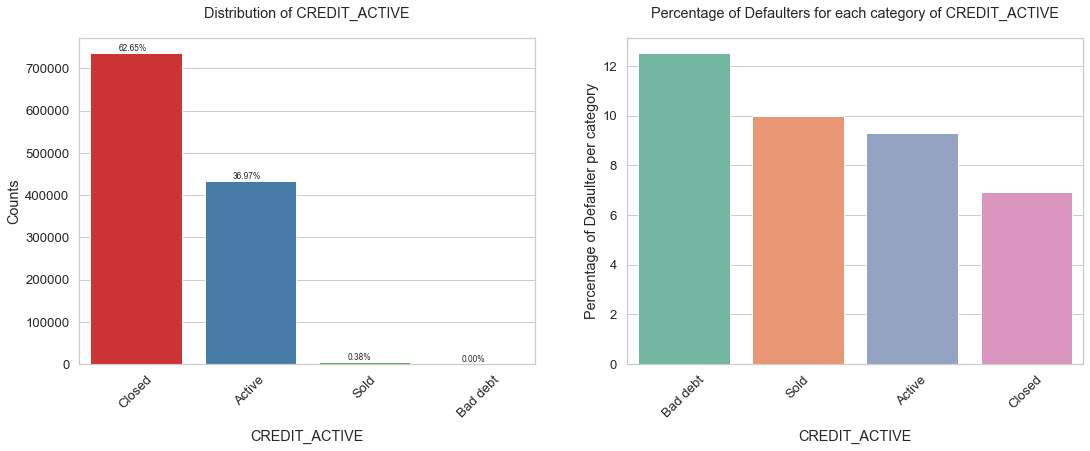

In [25]:
plot_categorical_variables_bar(data_merged,'CREDIT_ACTIVE',rotation=45, horizontal_adjust=0.25 )

### Trạng thái của các khoản tín dụng Bureau là 62.9% là Closed, 36.7% là Active, 0.4% là đã được bán, <0.1% là nợ xấu 

Total Number of unique categories of CREDIT_CURRENCY = 5


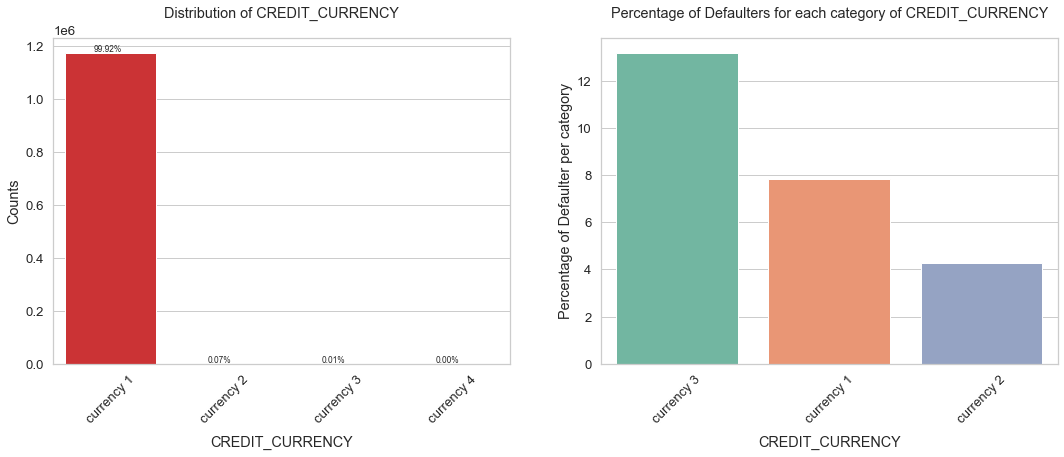

In [26]:
plot_categorical_variables_bar(data_merged,'CREDIT_CURRENCY',rotation=45, horizontal_adjust=0.25 )

### Trong 4 loại tiền tệ, từ currency 1 đến currency 4 thì 99.9%  là loại 1 

Total Number of unique categories of CREDIT_TYPE = 16


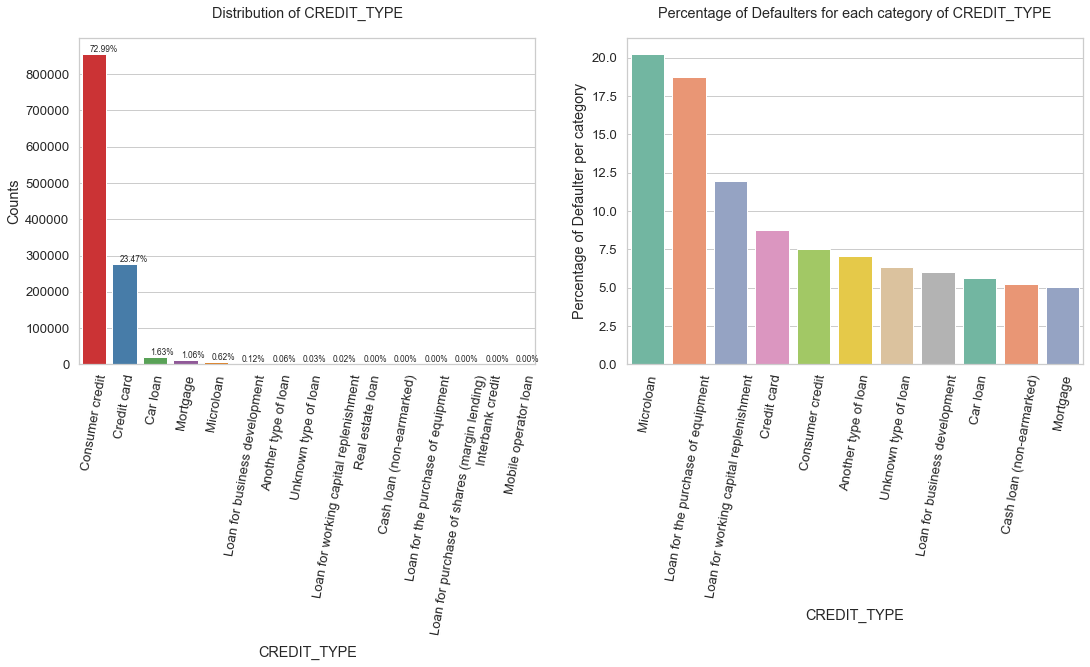

In [27]:
plot_categorical_variables_bar(data_merged,'CREDIT_TYPE',rotation=80, horizontal_adjust=0.25 )

### Có tổng cộng 15 loại tín dụng, 72.9% là tín dụng tiêu dùng, 23.4% là thẻ tín dụng 

### PROFILE REPORT 

In [28]:
# report = ProfileReport(data[['CREDIT_ACTIVE','CREDIT_CURRENCY','CREDIT_TYPE']], minimal=True)
# report.to_notebook_iframe()
# report.to_file("report.html", silent=False)

# $\color{red}{\text{Các biến Numerical}}$

In [29]:
def draw_distribution_dist(x, title,c):
    fig, ax = plt.subplots(2,1,figsize=(10,5))

    sns.distplot(x,ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')

    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')

    fig.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.show()

In [30]:
def plot_continuous_variables(data, column_name, plots = ['distplot', 'countplot', 'box'], scale_limits = None, figsize = (20,8), histogram = True, log_scale = False):
    '''
    Function to plot continuous variables distribution
    
    Inputs:
        data: DataFrame
            The DataFrame from which to plot.
        column_name: str
            Column's name whose distribution is to be plotted.
        plots: list, default = ['distplot', 'CDF', box', 'violin']
            List of plots to plot for Continuous Variable.
        scale_limits: tuple (left, right), default = None
            To control the limits of values to be plotted in case of outliers.
        figsize: tuple, default = (20,8)
            Size of the figure to be plotted.
        histogram: bool, default = True
            Whether to plot histogram along with distplot or not.
        log_scale: bool, default = False
            Whether to use log-scale for variables with outlying points.
    '''
    data_to_plot = data.copy()
    if scale_limits:
        #taking only the data within the specified limits
        data_to_plot[column_name] = data[column_name][(data[column_name] > scale_limits[0]) & (data[column_name] < scale_limits[1])]

    number_of_subplots = len(plots)
    plt.figure(figsize = figsize)
    sns.set_style('whitegrid')
    
    for i, ele in enumerate(plots):
        plt.subplot(1, number_of_subplots, i + 1)
        plt.subplots_adjust(wspace=0.25)
            
        if ele == 'distplot':  
            sns.distplot(data_to_plot[column_name][data['TARGET'] == 0].dropna(),
                         label='Non-Defaulters', hist = False, color='red')
            sns.distplot(data_to_plot[column_name][data['TARGET'] == 1].dropna(),
                         label='Defaulters', hist = False, color='black')
            plt.xlabel(column_name)
            plt.ylabel('Probability Density')
            plt.legend(fontsize='medium')
            plt.title("Dist-Plot of {}".format(column_name))
            if log_scale:
                plt.xscale('log')
                plt.xlabel(f'{column_name} (log scale)')

        if ele == 'box':  
            sns.boxplot(x='TARGET', y=column_name, data=data_to_plot)
            plt.title("Box-Plot of {}".format(column_name))
            if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{column_name} (log Scale)')
                
        if ele == 'countplot':
            sns.countplot(data_to_plot[column_name],hue=data_to_plot['TARGET'])
#             ax.set_xticklabels(ax.get_xticklabels(), rotation= 60)
#             plt.show()

    plt.show()

In [31]:
data_merged['YEARS_CREDIT'] = abs(data_merged['DAYS_CREDIT'] / 365)

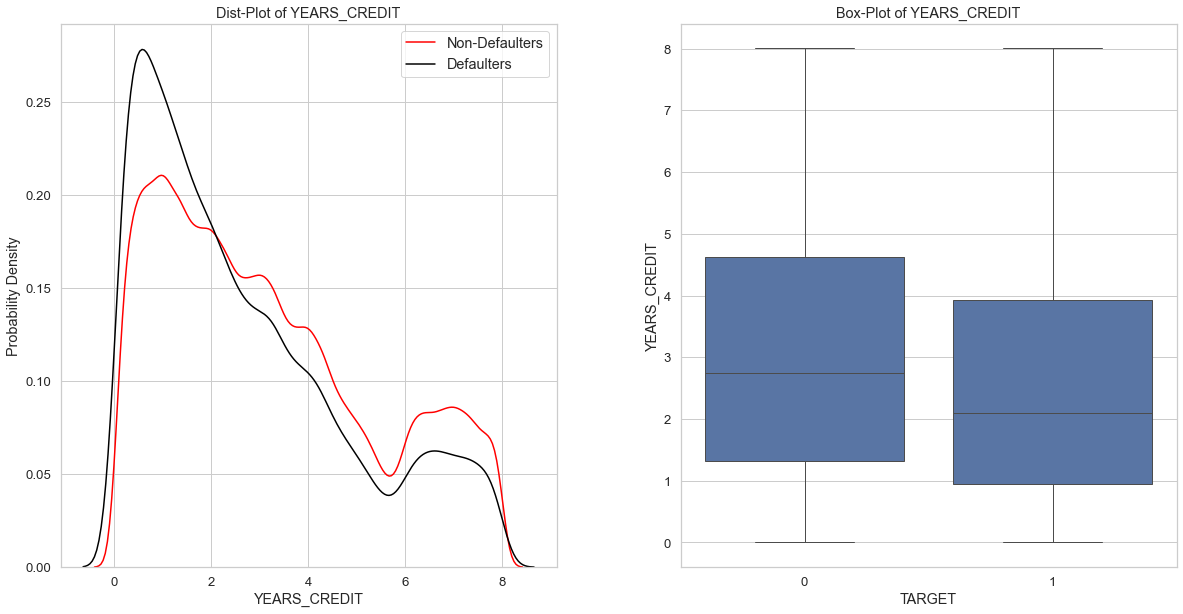

In [32]:
plot_continuous_variables(data_merged,'YEARS_CREDIT', plots = ['distplot','box'],figsize=(20,10))

### From this plot, we observe that the Non-Defaulters usually have longer periods of Credits as compared to Defaulters. This can be visualized both from the Box-Plot and the PDF. The Defaulters have a higher Peak in PDF in lower YEARS_CREDIT range of values.

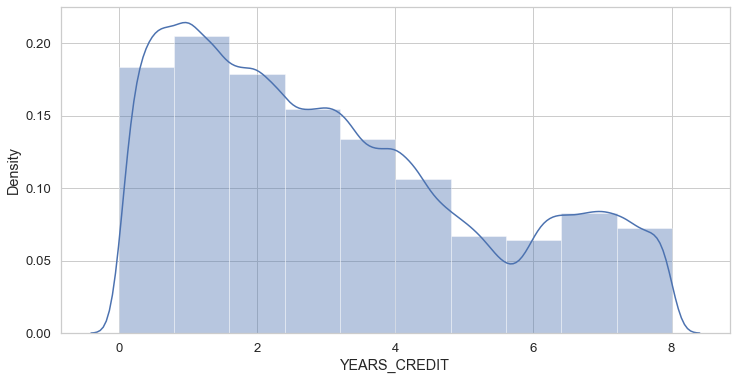

In [33]:
plt.figure(figsize= (12,6))
sns.distplot(data_merged['YEARS_CREDIT'], bins=10)
plt.show()

# $\color{red}{\text{Number of past loans per customer}}$

In [34]:
num_past_loan_target = data_merged[['SK_ID_CURR', 'DAYS_CREDIT', 'TARGET']].groupby(['SK_ID_CURR', 'TARGET'])['DAYS_CREDIT'].count().reset_index()
num_past_loan_target.columns = ['SK_ID_CURR','TARGET','num_of_past_loans']
num_past_loan_target

,SK_ID_CURR,TARGET,num_of_past_loans
0,0,0,1
1,1,1,1
2,2,0,6
3,3,0,7
4,4,0,6
...,...,...,...
246004,307505,0,2
246005,307506,0,4
246006,307507,0,0
246007,307509,0,2


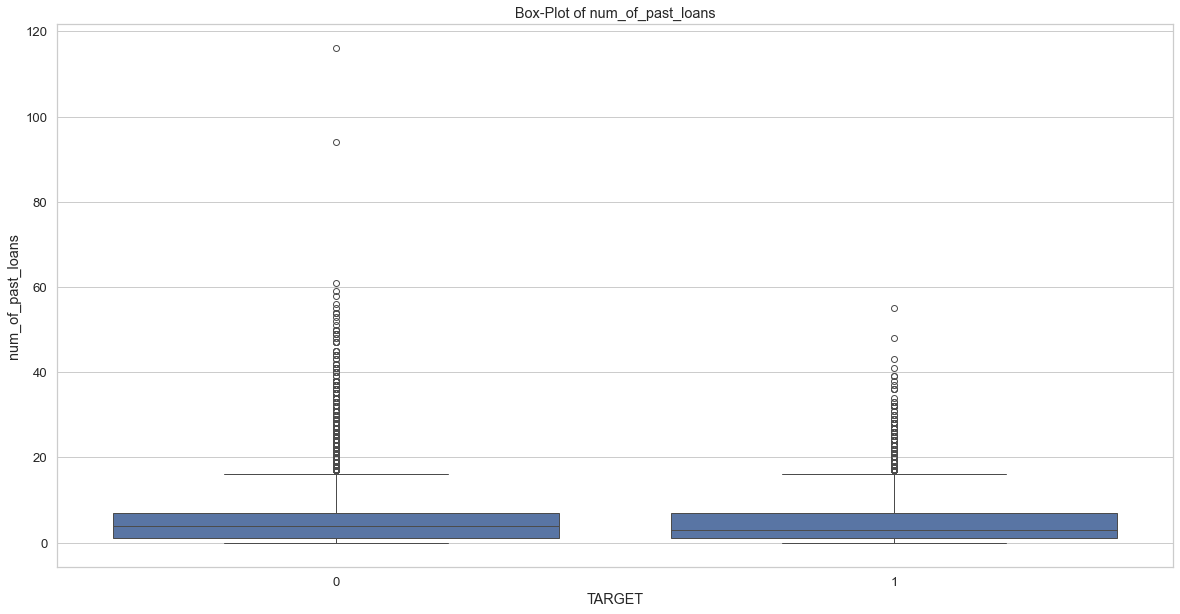

In [36]:
plot_continuous_variables(num_past_loan_target,'num_of_past_loans', plots = ['box'],figsize=(20,10))

### Phân bố khá giống nhau, có vẻ như biến này không quá ảnh hưởng đến biến TARGET

In [38]:
num_past_loan = data[['SK_ID_CURR', 'DAYS_CREDIT']].groupby('SK_ID_CURR')['DAYS_CREDIT'].count().reset_index()
num_past_loan.columns = ['SK_ID_CURR','PAST_LOAN_COUNT']
num_past_loan

,SK_ID_CURR,PAST_LOAN_COUNT
0,0,1
1,1,1
2,2,6
3,3,7
4,4,6
...,...,...
263486,307504,4
263487,307505,2
263488,307506,4
263489,307508,7




# $\color{red}{\text{Number of types of past loans per customer}}$

In [39]:
num_of_type_target = data_merged[['SK_ID_CURR','CREDIT_TYPE','TARGET']].groupby(['SK_ID_CURR','TARGET']).nunique().reset_index()
num_of_type_target.columns = ['SK_ID_CURR','TARGET','num_of_credit_type']
num_of_type_target

,SK_ID_CURR,TARGET,num_of_credit_type
0,0,0,1
1,1,1,1
2,2,0,1
3,3,0,2
4,4,0,2
...,...,...,...
246004,307505,0,2
246005,307506,0,1
246006,307507,0,0
246007,307509,0,2


### VÍ DỤ:  Trong 8 past loans của 100002 thì sẽ được chia làm 2 loại 



ValueError: The following variable cannot be assigned with wide-form data: `hue`

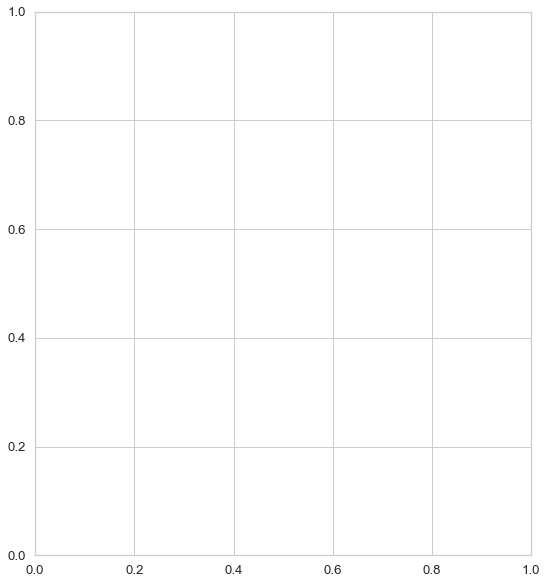

In [40]:
# fig, ax = plt.subplots(1, figsize= (18,6))
# sns.countplot(num_of_type_target.num_of_credit_type, hue=num_of_type_target['TARGET'])
# ax.set_xticklabels(ax.get_xticklabels(), rotation= 60)
# plt.show()

plot_continuous_variables(num_of_type_target,'num_of_credit_type', plots = ['countplot','box'],figsize=(20,10))

### Nhìn chung phần lớn khách hàng sẽ có 2 loại loans trc khi apply for credit bureau credit 

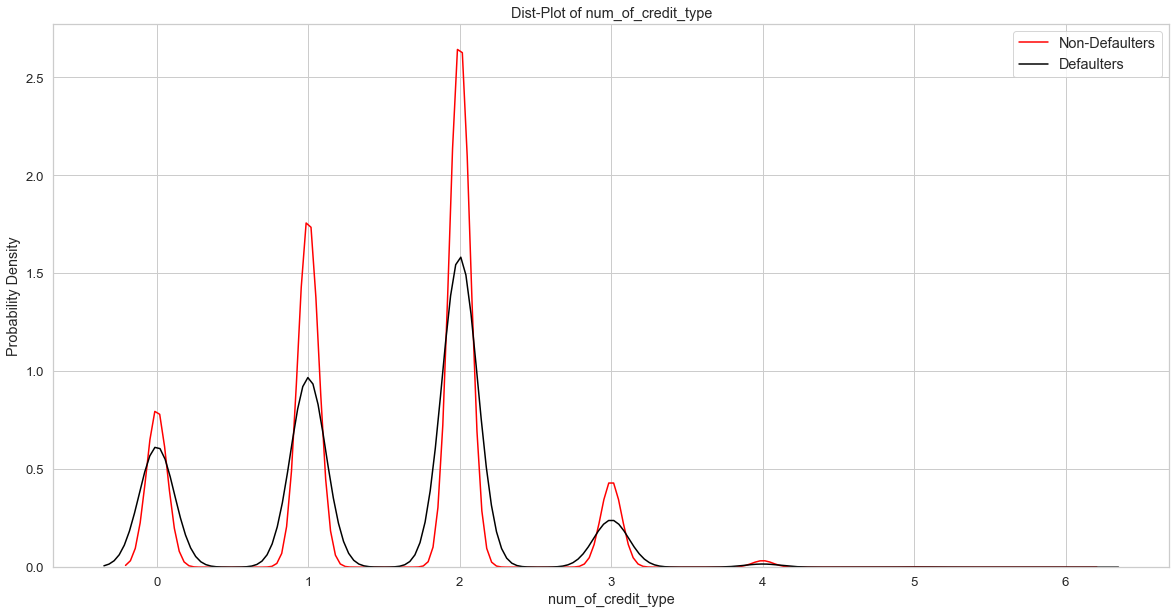

In [ ]:
plot_continuous_variables(num_of_type_target,'num_of_credit_type', plots = ['distplot'],figsize=(20,10))

### Phân bố khá giống nhau, có vẻ yếu tố number of credit type không ảnh hưởng đến việc khách hàng có gặp khó khăn trong việc trả nợ hay không 

In [ ]:
num_of_type = data[['SK_ID_CURR','CREDIT_TYPE']].groupby(['SK_ID_CURR']).nunique().reset_index()
num_of_type.columns = ['SK_ID_CURR','CREDIT_TYPE_COUNT']
num_of_type

,SK_ID_CURR,CREDIT_TYPE_COUNT
0,100001,1
1,100002,2
2,100003,2
3,100004,1
4,100005,2
...,...,...
305806,456249,3
305807,456250,2
305808,456253,2
305809,456254,1


# $\color{red}{\text{The percentage of active loans per customer }}$

In [41]:
data_merged['CREDIT_ACTIVE_BINARY'] = data_merged['CREDIT_ACTIVE']

def check(status):
    if status == 'Closed':
        result = 0
    else:
        result = 1 
    return result

data_merged['CREDIT_ACTIVE_BINARY'] = data_merged.apply(lambda x: check(x.CREDIT_ACTIVE), axis = 1)

atv_loans_target = data_merged.groupby(by = ['SK_ID_CURR', 'TARGET'])['CREDIT_ACTIVE_BINARY'].mean().reset_index().rename(index=str, columns={'CREDIT_ACTIVE_BINARY': 'ACTIVE_LOANS_PERCENTAGE'})
atv_loans_target['ACTIVE_LOANS_PERCENTAGE'] = atv_loans_target['ACTIVE_LOANS_PERCENTAGE'] * 100
atv_loans_target

,SK_ID_CURR,TARGET,ACTIVE_LOANS_PERCENTAGE
0,0,0,100.000000
1,1,1,100.000000
2,2,0,33.333333
3,3,0,42.857143
4,4,0,50.000000
...,...,...,...
246004,307505,0,100.000000
246005,307506,0,0.000000
246006,307507,0,100.000000
246007,307509,0,50.000000


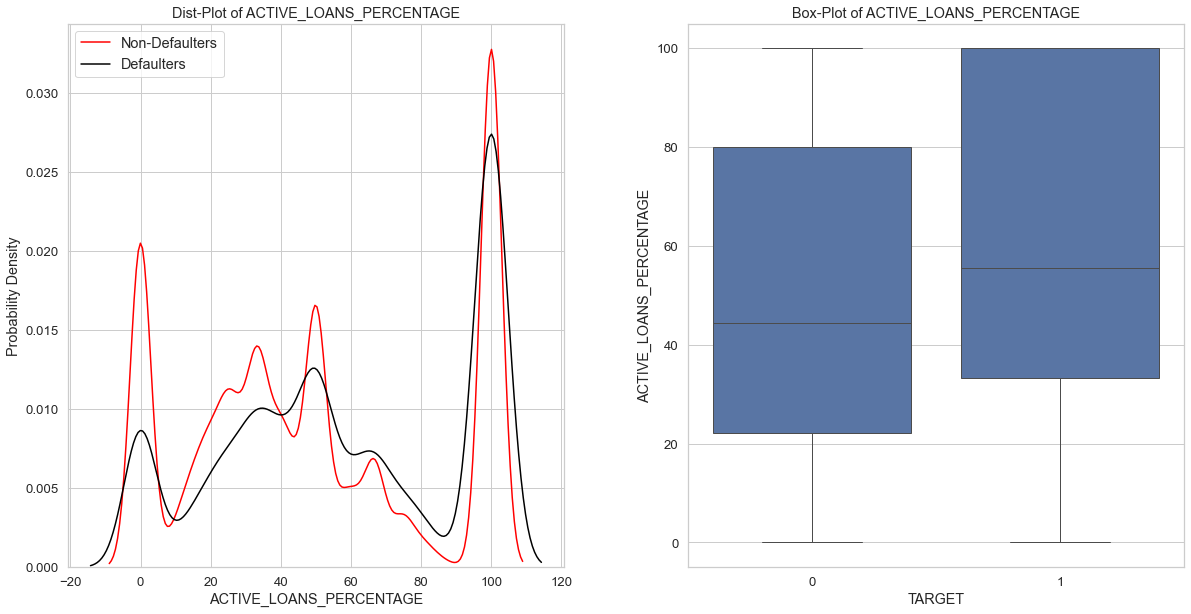

In [42]:
plot_continuous_variables(atv_loans_target,"ACTIVE_LOANS_PERCENTAGE", plots = ['distplot','box'],figsize=(20,10))

### We can clearly see that defaulters often have a higher percentage of their active debt than non-defaulters
### =>  Customer with  high percentage of active loan may have potential is a defaulter

In [43]:
data['CREDIT_ACTIVE_BINARY'] = data['CREDIT_ACTIVE']

def check(status):
    if status == 'Closed':
        result = 0
    else:
        result = 1 
    return result

data['CREDIT_ACTIVE_BINARY'] = data.apply(lambda x: check(x.CREDIT_ACTIVE), axis = 1)

atv_loans = data.groupby(by = ['SK_ID_CURR'])['CREDIT_ACTIVE_BINARY'].mean().reset_index().rename(index=str, columns={'CREDIT_ACTIVE_BINARY': 'ACTIVE_LOANS_PERCENTAGE'})
atv_loans['ACTIVE_LOANS_PERCENTAGE'] = atv_loans['ACTIVE_LOANS_PERCENTAGE'] * 100
data = data.drop(columns=['CREDIT_ACTIVE_BINARY'])
atv_loans


,SK_ID_CURR,ACTIVE_LOANS_PERCENTAGE
0,0,100.000000
1,1,100.000000
2,2,33.333333
3,3,42.857143
4,4,50.000000
...,...,...
263486,307504,25.000000
263487,307505,100.000000
263488,307506,0.000000
263489,307508,57.142857


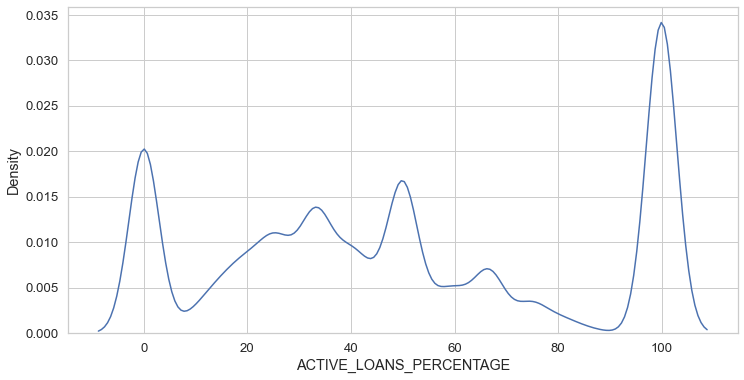

In [44]:
plt.figure(figsize= (12,6))
sns.distplot(atv_loans_target["ACTIVE_LOANS_PERCENTAGE"], bins=10,hist = False)
plt.show()

### Ví dụ khách hàng 100002 có 8 cái past loan và trong đó có 2 cái active

### => active loan percentage của 100002 sẽ ~ 25%

# $\color{red}{\text{The Ratio of Total Debt to Total Credit for each Customer}}$

In [45]:
data_with_sum_debt_pos_sign = data_merged[data_merged['AMT_CREDIT_SUM_DEBT']>0]

#chỉ consider những khoản debt đã đc trả hoàn toàn.
grp1 = data_with_sum_debt_pos_sign[['SK_ID_CURR', 'AMT_CREDIT_SUM_DEBT']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM_DEBT'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM_DEBT': 'TOTAL_CUSTOMER_DEBT'})
grp2 = data_merged[['SK_ID_CURR', 'AMT_CREDIT_SUM']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM': 'TOTAL_CUSTOMER_CREDIT'})

data_merged = data_merged.merge(grp1, on = ['SK_ID_CURR'], how = 'left')
data_merged = data_merged.merge(grp2, on = ['SK_ID_CURR'], how = 'left')
del grp1, grp2


data_merged['DEBT_CREDIT_RATIO'] = (data_merged['TOTAL_CUSTOMER_DEBT']/data_merged['TOTAL_CUSTOMER_CREDIT'])*100
data_merged['DEBT_CREDIT_RATIO'] = data_merged['DEBT_CREDIT_RATIO'].replace([np.inf, -np.inf], np.nan)

del data_merged['TOTAL_CUSTOMER_DEBT'], data_merged['TOTAL_CUSTOMER_CREDIT']

debt_credit_target = data_merged.groupby(by = ['SK_ID_CURR','TARGET'])['DEBT_CREDIT_RATIO'].mean().reset_index().rename(index=str)
debt_credit_target

,SK_ID_CURR,TARGET,DEBT_CREDIT_RATIO
0,0,0,90.706731
1,1,1,NaN
2,2,0,37.908544
3,3,0,41.072109
4,4,0,44.445915
...,...,...,...
246004,307505,0,NaN
246005,307506,0,NaN
246006,307507,0,NaN
246007,307509,0,8.857143


In [46]:
debt_credit_target = debt_credit_target[debt_credit_target['DEBT_CREDIT_RATIO'] <= 100]

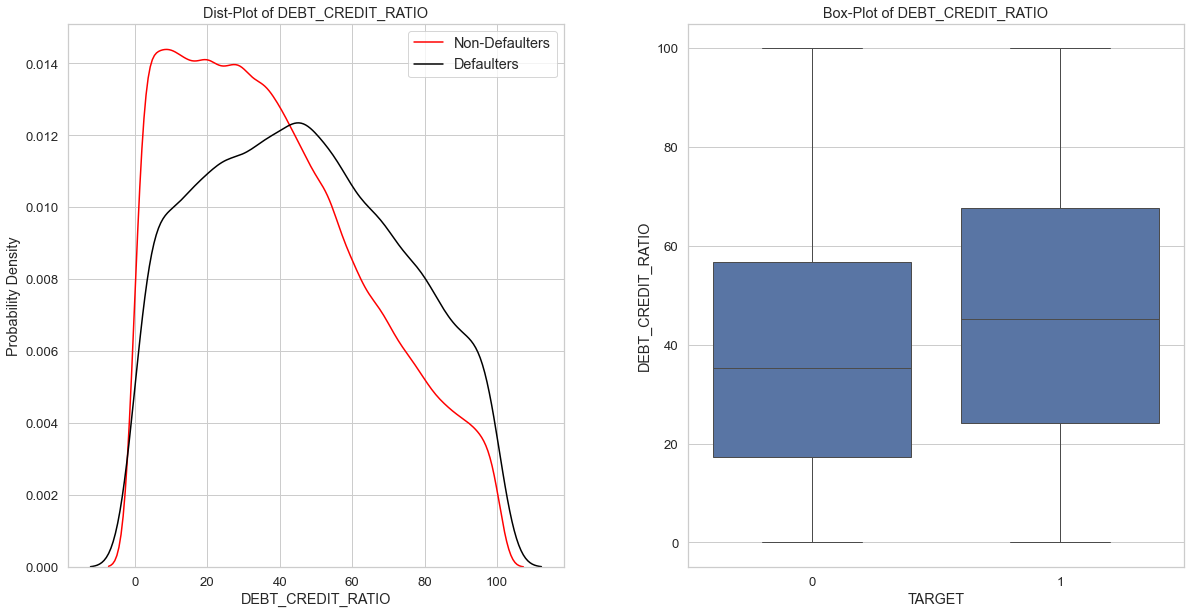

In [47]:
plot_continuous_variables(debt_credit_target,"DEBT_CREDIT_RATIO", plots = ['distplot', 'box'],figsize=(20,10))

In [48]:
data_with_sum_debt_pos_sign_all = data[data['AMT_CREDIT_SUM_DEBT']>0]

#chỉ consider những khoản debt đã đc trả hoàn toàn.
grp1 = data_with_sum_debt_pos_sign_all[['SK_ID_CURR', 'AMT_CREDIT_SUM_DEBT']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM_DEBT'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM_DEBT': 'TOTAL_CUSTOMER_DEBT'})
grp2 = data[['SK_ID_CURR', 'AMT_CREDIT_SUM']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM': 'TOTAL_CUSTOMER_CREDIT'})

data = data.merge(grp1, on = ['SK_ID_CURR'], how = 'left')
data = data.merge(grp2, on = ['SK_ID_CURR'], how = 'left')
del grp1, grp2


data['DEBT_CREDIT_RATIO'] = (data['TOTAL_CUSTOMER_DEBT']/data['TOTAL_CUSTOMER_CREDIT'])*100
data['DEBT_CREDIT_RATIO'] = data['DEBT_CREDIT_RATIO'].replace([np.inf, -np.inf], np.nan)

del data['TOTAL_CUSTOMER_DEBT'], data['TOTAL_CUSTOMER_CREDIT']

debt_credit = data.groupby(by = ['SK_ID_CURR'])['DEBT_CREDIT_RATIO'].mean().reset_index().rename(index=str)
debt_credit

,SK_ID_CURR,DEBT_CREDIT_RATIO
0,0,90.706731
1,1,NaN
2,2,37.908544
3,3,41.072109
4,4,44.445915
...,...,...
263486,307504,13.827518
263487,307505,NaN
263488,307506,NaN
263489,307508,4.571994


### A High value may be a red flag indicative of potential default

# $\color{red}{\text{Count Overdue Counts}}$

In [49]:
def overDue(df):
    name_flag = 'OVERDUE_FLAG'
    name = 'OVERDUE'
    
    def fun(x):
        days = abs(x)
        if days > 0:
            return 1
        else:
            return 0

    df[name_flag] = df['CREDIT_DAY_OVERDUE'].apply(fun)
    
    df[name] = df.groupby('SK_ID_CURR')[name_flag].transform('sum')
    
    #lets increase the groups by 1 to make the base group 1
    df[name] = df[name].apply(lambda x:x+1)
    
    #drop column
    df.drop([name_flag],axis=1, inplace=True)

#apply function
overDue(data)

In [50]:
data.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,SK_ID_CURR,DEBT_CREDIT_RATIO,OVERDUE
0,5714462,Closed,currency 1,-497,0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,254629,4.761731,1
1,5714463,Active,currency 1,-208,0,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,254629,4.761731,1
2,5714464,Active,currency 1,-203,0,NaN,0,464323.5,0.0,NaN,0.0,Consumer credit,254629,4.761731,1
3,5714465,Active,currency 1,-203,0,NaN,0,90000.0,0.0,NaN,0.0,Credit card,254629,4.761731,1
4,5714466,Active,currency 1,-629,0,77674.5,0,2700000.0,0.0,NaN,0.0,Consumer credit,254629,4.761731,1


In [51]:
data.shape

(1465325, 15)

# $\color{red}{\text{Add Features}}$

In [53]:
final_dataset = data.merge(num_past_loan,
                                      how='left', 
                                      on='SK_ID_CURR')
final_dataset = final_dataset.merge(atv_loans,
                                      how='left', 
                                      on='SK_ID_CURR')
final_dataset = final_dataset.merge(debt_credit,
                                      how='left', 
                                      on='SK_ID_CURR')


In [54]:
final_dataset

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,SK_ID_CURR,DEBT_CREDIT_RATIO_x,OVERDUE,PAST_LOAN_COUNT,ACTIVE_LOANS_PERCENTAGE,DEBT_CREDIT_RATIO_y
0,5714462,Closed,currency 1,-497,0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,254629,4.761731,1,11,54.545455,4.761731
1,5714463,Active,currency 1,-208,0,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,254629,4.761731,1,11,54.545455,4.761731
2,5714464,Active,currency 1,-203,0,NaN,0,464323.5,0.0,NaN,0.0,Consumer credit,254629,4.761731,1,11,54.545455,4.761731
3,5714465,Active,currency 1,-203,0,NaN,0,90000.0,0.0,NaN,0.0,Credit card,254629,4.761731,1,11,54.545455,4.761731
4,5714466,Active,currency 1,-629,0,77674.5,0,2700000.0,0.0,NaN,0.0,Consumer credit,254629,4.761731,1,11,54.545455,4.761731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465320,5052629,Closed,currency 1,-532,0,NaN,0,450000.0,0.0,0.0,0.0,Consumer credit,66820,NaN,1,1,0.000000,NaN
1465321,5054382,Closed,currency 1,-381,0,0.0,0,19800.0,0.0,0.0,0.0,Consumer credit,166221,NaN,1,1,0.000000,NaN
1465322,5043236,Active,currency 1,-1441,0,NaN,0,1800000.0,1076809.5,0.0,0.0,Mortgage,118290,59.822750,1,1,100.000000,59.822750
1465323,5053303,Closed,currency 1,-375,0,NaN,0,175054.5,0.0,NaN,0.0,Consumer credit,95296,NaN,1,1,0.000000,NaN


In [55]:
final_dataset = final_dataset.drop(columns = ['DEBT_CREDIT_RATIO_y'])

In [56]:
final_dataset = final_dataset.rename(columns = {'DEBT_CREDIT_RATIO_x': 'DEBT_CREDIT_RATIO'})

In [57]:
final_dataset

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,SK_ID_CURR,DEBT_CREDIT_RATIO,OVERDUE,PAST_LOAN_COUNT,ACTIVE_LOANS_PERCENTAGE
0,5714462,Closed,currency 1,-497,0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,254629,4.761731,1,11,54.545455
1,5714463,Active,currency 1,-208,0,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,254629,4.761731,1,11,54.545455
2,5714464,Active,currency 1,-203,0,NaN,0,464323.5,0.0,NaN,0.0,Consumer credit,254629,4.761731,1,11,54.545455
3,5714465,Active,currency 1,-203,0,NaN,0,90000.0,0.0,NaN,0.0,Credit card,254629,4.761731,1,11,54.545455
4,5714466,Active,currency 1,-629,0,77674.5,0,2700000.0,0.0,NaN,0.0,Consumer credit,254629,4.761731,1,11,54.545455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465320,5052629,Closed,currency 1,-532,0,NaN,0,450000.0,0.0,0.0,0.0,Consumer credit,66820,NaN,1,1,0.000000
1465321,5054382,Closed,currency 1,-381,0,0.0,0,19800.0,0.0,0.0,0.0,Consumer credit,166221,NaN,1,1,0.000000
1465322,5043236,Active,currency 1,-1441,0,NaN,0,1800000.0,1076809.5,0.0,0.0,Mortgage,118290,59.822750,1,1,100.000000
1465323,5053303,Closed,currency 1,-375,0,NaN,0,175054.5,0.0,NaN,0.0,Consumer credit,95296,NaN,1,1,0.000000




# $\color{red}{\text{Merge With Bureau Balance}}$

In [60]:
bureau_balance = pd.read_csv('D:\\DSEB 63 - NEU\\Năm BA\\Visualization\\Data\\Data\\dseb63_final_project_DP_dataset\\dseb63_bureau_balance.csv')
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [61]:
def extract_mean(x):
    y = x.groupby('SK_ID_BUREAU', as_index=False).mean().add_prefix('BUR_BAL_MEAN_') 
    return y

In [62]:
# apply formula to create bureau_balance dataframe grouped by SK_ID_BUREAU with mean values of all numerical columns
bureau_bal_mean = extract_mean(bureau_balance)

In [63]:
bureau_bal_mean.head()

,BUR_BAL_MEAN_SK_ID_BUREAU,BUR_BAL_MEAN_MONTHS_BALANCE
0,5001709,-48.0
1,5001710,-41.0
2,5001711,-1.5
3,5001712,-9.0
4,5001713,-10.5


In [64]:
bureau_bal_mean = bureau_bal_mean.rename(columns = {'BUR_BAL_MEAN_SK_ID_BUREAU' : 'SK_ID_BUREAU'})

In [65]:
final_dataset = final_dataset.merge(bureau_bal_mean,  on = 'SK_ID_BUREAU', how = 'left')
final_dataset.drop('SK_ID_BUREAU', axis = 1, inplace = True) # we don't need this internal ID anymore

In [66]:
final_dataset

,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,SK_ID_CURR,DEBT_CREDIT_RATIO,OVERDUE,PAST_LOAN_COUNT,ACTIVE_LOANS_PERCENTAGE,BUR_BAL_MEAN_MONTHS_BALANCE
0,Closed,currency 1,-497,0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,254629,4.761731,1,11,54.545455,NaN
1,Active,currency 1,-208,0,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,254629,4.761731,1,11,54.545455,NaN
2,Active,currency 1,-203,0,NaN,0,464323.5,0.0,NaN,0.0,Consumer credit,254629,4.761731,1,11,54.545455,NaN
3,Active,currency 1,-203,0,NaN,0,90000.0,0.0,NaN,0.0,Credit card,254629,4.761731,1,11,54.545455,NaN
4,Active,currency 1,-629,0,77674.5,0,2700000.0,0.0,NaN,0.0,Consumer credit,254629,4.761731,1,11,54.545455,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465320,Closed,currency 1,-532,0,NaN,0,450000.0,0.0,0.0,0.0,Consumer credit,66820,NaN,1,1,0.000000,-8.5
1465321,Closed,currency 1,-381,0,0.0,0,19800.0,0.0,0.0,0.0,Consumer credit,166221,NaN,1,1,0.000000,-6.0
1465322,Active,currency 1,-1441,0,NaN,0,1800000.0,1076809.5,0.0,0.0,Mortgage,118290,59.822750,1,1,100.000000,NaN
1465323,Closed,currency 1,-375,0,NaN,0,175054.5,0.0,NaN,0.0,Consumer credit,95296,NaN,1,1,0.000000,-6.0


In [67]:
def extract_mean_bur(x):
    y = x.groupby('SK_ID_CURR', as_index=False).mean().add_prefix('BUR_MEAN_') # note that we have changed the ID to group by and the prefix to add
    return y

In [68]:
final_data_mean_values = extract_mean_bur(final_dataset)
final_data_mean_values = final_data_mean_values.rename(columns = {'BUR_MEAN_SK_ID_CURR' : 'SK_ID_CURR'})

In [69]:
final_data_mean_values

,SK_ID_CURR,BUR_MEAN_DAYS_CREDIT,BUR_MEAN_CREDIT_DAY_OVERDUE,BUR_MEAN_AMT_CREDIT_MAX_OVERDUE,BUR_MEAN_CNT_CREDIT_PROLONG,BUR_MEAN_AMT_CREDIT_SUM,BUR_MEAN_AMT_CREDIT_SUM_DEBT,BUR_MEAN_AMT_CREDIT_SUM_LIMIT,BUR_MEAN_AMT_CREDIT_SUM_OVERDUE,BUR_MEAN_DEBT_CREDIT_RATIO,BUR_MEAN_OVERDUE,BUR_MEAN_PAST_LOAN_COUNT,BUR_MEAN_ACTIVE_LOANS_PERCENTAGE,BUR_MEAN_BUR_BAL_MEAN_MONTHS_BALANCE
0,0,-63.000000,0.0,NaN,0.0,8.551350e+04,77566.500000,NaN,0.0,90.706731,1.0,1.0,100.000000,NaN
1,1,-2348.000000,0.0,11666.385,0.0,2.835000e+04,0.000000,0.0000,0.0,NaN,1.0,1.0,100.000000,-50.500000
2,2,-810.333333,0.0,3771.990,0.0,4.239018e+04,16069.500000,0.0000,0.0,37.908544,1.0,6.0,33.333333,NaN
3,3,-1131.428571,0.0,0.000,0.0,6.913607e+04,28395.642857,0.0000,0.0,41.072109,1.0,7.0,42.857143,NaN
4,4,-773.333333,0.0,NaN,0.0,4.704240e+05,209084.250000,0.0000,0.0,44.445915,1.0,6.0,50.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263486,307504,-1149.750000,0.0,0.000,0.0,2.165383e+05,29941.875000,0.0000,0.0,13.827518,1.0,4.0,25.000000,NaN
263487,307505,-461.500000,0.0,0.000,0.0,1.809000e+06,0.000000,540000.0000,0.0,NaN,1.0,2.0,100.000000,-7.250000
263488,307506,-1390.500000,0.0,NaN,0.0,6.481575e+04,0.000000,0.0000,0.0,NaN,1.0,4.0,0.000000,NaN
263489,307508,-765.428571,0.0,0.000,0.0,7.866153e+05,35964.000000,300.7875,0.0,4.571994,1.0,7.0,57.142857,-18.142857


In [70]:
final_data_mean_values.to_csv('D:\\DSEB 63 - NEU\\Năm BA\\Visualization\\train data\\bureau_full.csv', index = False)
# print('done')